In [257]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from IPython.display import display, Math

#### Heat Equation

\begin{equation}
    \partial_{t}u = \partial^2_{x}u , \quad 0 < x < 2, \quad t > 0 \\
\end{equation}
\begin{equation}
    -\partial_{x}u(0,t) = 1, \quad {u}(2,t) = 1\\
\end{equation}
\begin{equation}
    u(x, 0) = 3 - x + cos(\frac{3 \pi x}{4})
\end{equation}

#### Exact solution

\begin{equation}
    u(x, t) = 3 - x + cos(\frac{3 \pi x}{4})exp(-(\frac{3}{4} \pi)^2t)
\end{equation}



In [258]:
omega = 0.75 * np.pi

a = 1
u_0 = lambda x: 3 - x + np.cos(omega *x)
g_0 = lambda t: 1
g_1 = lambda t: 1

l, T = 2, 1
Nx = 50

u = lambda x,t:  3 - x + np.cos(omega * x) * np.exp(-omega ** 2 * t)

def ue(t, x):
    Nt, Nx = len(t), len(x)
    u = np.zeros(shape=(Nt, Nx))
    for j in range(Nt):
        tt = np.exp(-omega ** 2 * t[j])
        for i in range(Nx):
            u[j, i] = 3 - x[i] + np.cos(omega * x[i]) * tt
    return u

In [259]:
def plot_surface(xm,tm,um,title = '',x_lable = 'x',y_lable = 't',z_lable = 'Z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, tm , um, rstride=5, cstride=5,cmap = cm.jet )
    plt.show()

def mesh_params( Nx = Nx, L = l, T = T):
    Nt = int(2 * (T / l ** 2) * Nx ** 2)
    dx, dt = l / Nx, T / Nt
    return Nt, dx, dt

def mesh(Nx, Nt, x_0 = 0, x_N = l, t_0 = 0, t_N = T):
    return np.linspace(x_0, x_N, Nx+1), np.linspace(t_0, t_N, Nt+1)

def solve(Nx, l, T, u_0, g_0, g_1):
    Nt, dx, dt = mesh_params(Nx, l, T)
    x, t = mesh(Nx, Nt)
    U = np.zeros(shape = (Nt+1, Nx+1))
    U[0, :] = u_0(x)
    U[:, -1] = g_1(t)
    u_m = ue(t,x)

    s = dt / dx ** 2
    for j in range(Nt):
        for i in range(1, Nx):
            U[j + 1, i] = U[j, i] + s * (U[j, i - 1] - 2 * U[j, i] + U[j, i + 1])
        U[j + 1, 0] = (4 * U[j + 1, 1] - U[j + 1, 2] + 2 * dx) / 3

    return U, u_m

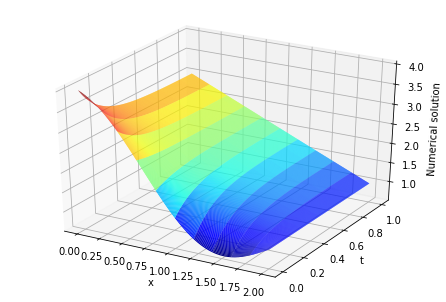

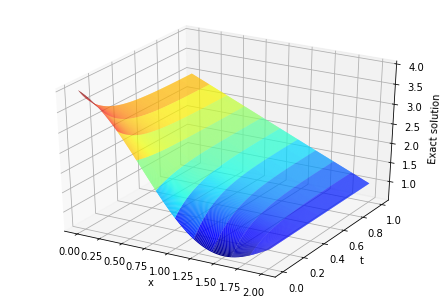

Максимальная погрешность: 0.0006720975749612279
Теоретический порядок погрешности O(dx^2 + dt): 0.0024000000000000002


In [260]:
Nx = 50
Nt, dx, dt = mesh_params(Nx)
x, t = mesh(Nx, Nt)
U, u_m = solve(Nx, l, T, u_0, g_0, g_1)
x_mesh, t_mesh = np.meshgrid(x, t)
plot_surface(x_mesh, t_mesh, U,  z_lable = 'Numerical solution')
plot_surface(x_mesh, t_mesh, u_m, z_lable = 'Exact solution')

err = np.abs(U - u_m)
print("Максимальная погрешность:", np.max(err))
print("Теоретический порядок погрешности O(dx^2 + dt):", dx ** 2 + dt)